In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Timeseries of AAPL230616C00150000 price

In [2]:
opt_prices_iv  = pd.read_csv('data/opt_prices550_iv.csv')

In [3]:
opt_prices_iv = opt_prices_iv.set_index('date')
opt_prices_iv.index = pd.to_datetime(opt_prices_iv.index)

In [4]:
opt_prices_iv.head(5)

,price,underlying,daysToExp,bsm_iv
date,,,,
2021-03-24,15.40,118.497734,814,0.01
2021-03-25,14.36,118.991119,813,0.01
2021-03-26,14.25,119.602882,812,0.01
2021-03-29,13.90,119.780502,809,0.01
2021-03-30,13.25,118.310265,808,0.01


<AxesSubplot:xlabel='date'>

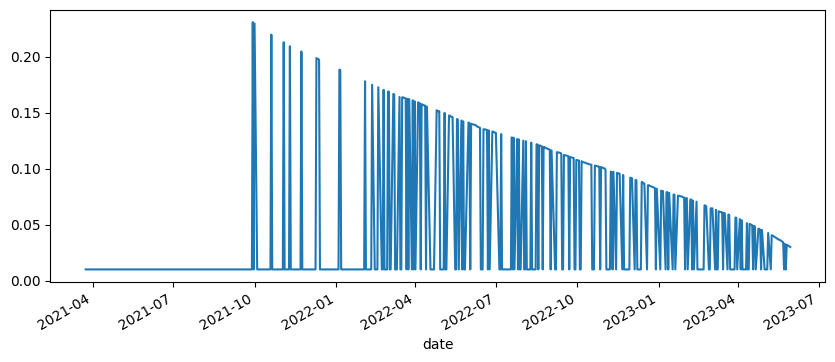

In [5]:
opt_prices_iv['bsm_iv'].plot(figsize=(10, 4))

# Pelt

In [6]:
import ruptures as rpt

ts = opt_prices_iv['price']
y = np.array(ts.tolist())

algo = rpt.Pelt(model="rbf")
algo.fit(y)
breaks = algo.predict(pen=3)

breaks_rpt = []
for i in breaks:
    breaks_rpt.append(ts.index[i-1])
breaks_rpt = pd.to_datetime(breaks_rpt)
breaks_rpt

DatetimeIndex(['2021-05-05', '2021-07-01', '2021-11-15', '2021-12-07',
               '2022-01-05', '2022-02-17', '2022-03-18', '2022-04-08',
               '2022-05-09', '2022-07-14', '2022-07-28', '2022-08-25',
               '2022-09-23', '2022-12-12', '2023-01-26', '2023-03-17',
               '2023-05-01', '2023-05-30'],
              dtype='datetime64[ns]', freq=None)

In [7]:
len(breaks_rpt)

18

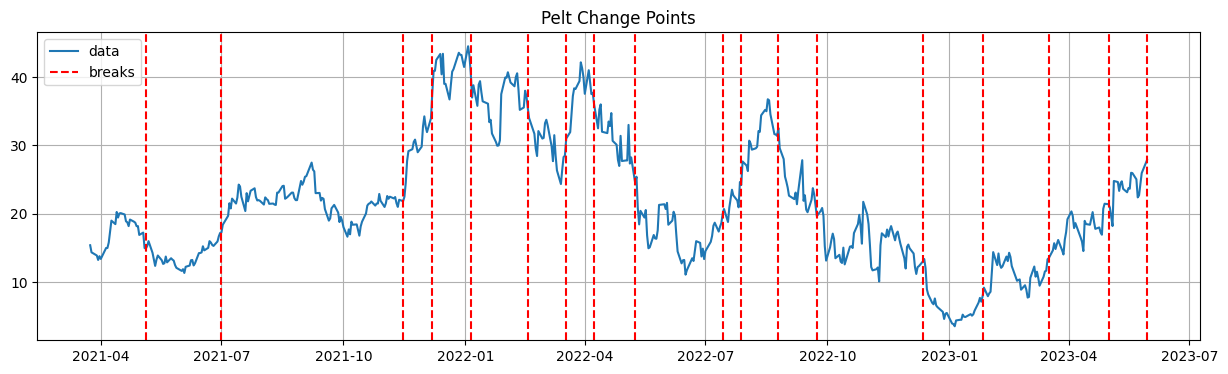

In [8]:
f = plt.figure()
f.set_figwidth(15)
f.set_figheight(4)

plt.plot(ts, label='data')
plt.title('Pelt Change Points')

print_legend = True

for i in breaks_rpt:
    if print_legend:
        plt.axvline(i, color='red',linestyle='dashed', label='breaks')
        print_legend = False
    else:
        plt.axvline(i, color='red',linestyle='dashed')

plt.grid()
plt.legend()
plt.show()

In [9]:
from sklearn.linear_model import LinearRegression

In [10]:
def regression_analysis(df, change_point_date):
    X = df['price'].values.reshape(-1, 1)
    y = df['bsm_iv'].values


    # change_point_date = '2022-10-19'#'yyyy-mm-dd'
    before_change = df[:change_point_date]
    after_change = df[change_point_date:]


    regressor_before = LinearRegression()
    regressor_before.fit(before_change['price'].values.reshape(-1, 1), before_change['bsm_iv'].values)

    regressor_after = LinearRegression()
    regressor_after.fit(after_change['price'].values.reshape(-1, 1), after_change['bsm_iv'].values)

    print('Changing Point:', change_point_date)
    print()

    print('Before Changing Point:')
    print('Intercept:', regressor_before.intercept_)
    print('Coefficient:', regressor_before.coef_)
    print()

    print('After Changing Point:')
    print('Intercept:', regressor_after.intercept_)
    print('Coefficient:', regressor_after.coef_)

    # Plotting Graph

    plt.scatter(before_change['price'], before_change['bsm_iv'], color='blue', label='Before Changing Point')
    plt.plot(before_change['price'], regressor_before.predict(before_change['price'].values.reshape(-1, 1)), color='blue')

    plt.scatter(after_change['price'], after_change['bsm_iv'], color='red', label='After Changing Point')
    plt.plot(after_change['price'], regressor_after.predict(after_change['price'].values.reshape(-1, 1)), color='red')

    plt.xlabel('Option Price')
    plt.ylabel('Volatility')
    plt.legend()

    plt.show()

Changing Point: 2022-09-23

Before Changing Point:
Intercept: 0.019927482555879932
Coefficient: [0.0009446]

After Changing Point:
Intercept: 0.06431409881189117
Coefficient: [-0.00099162]


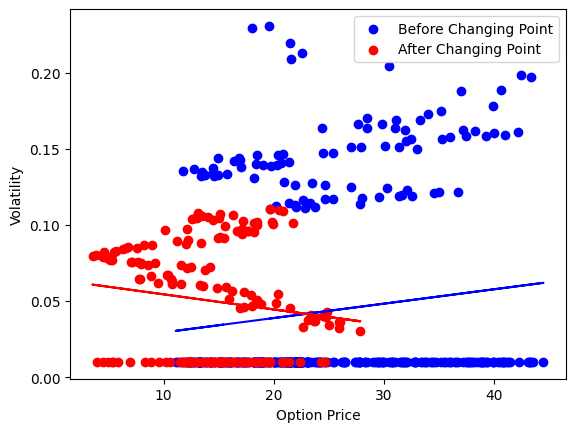

In [11]:
regression_analysis(df=opt_prices_iv, change_point_date='2022-09-23')

1
Changing Point: 2021-05-05 00:00:00

Before Changing Point:
Intercept: 0.010000000000000002
Coefficient: [6.20540306e-34]

After Changing Point:
Intercept: 0.04337761206648131
Coefficient: [0.00017659]


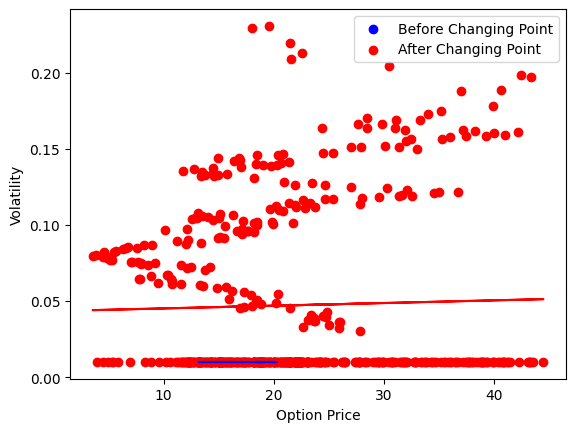

2
Changing Point: 2021-07-01 00:00:00

Before Changing Point:
Intercept: 0.01
Coefficient: [-0.]

After Changing Point:
Intercept: 0.05282225680629734
Coefficient: [-0.00011221]


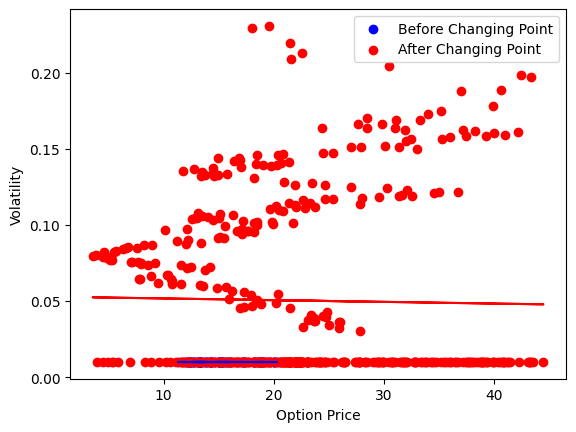

3
Changing Point: 2021-11-15 00:00:00

Before Changing Point:
Intercept: 0.0031914194766343145
Coefficient: [0.00069576]

After Changing Point:
Intercept: 0.06094194598604657
Coefficient: [-0.00015217]


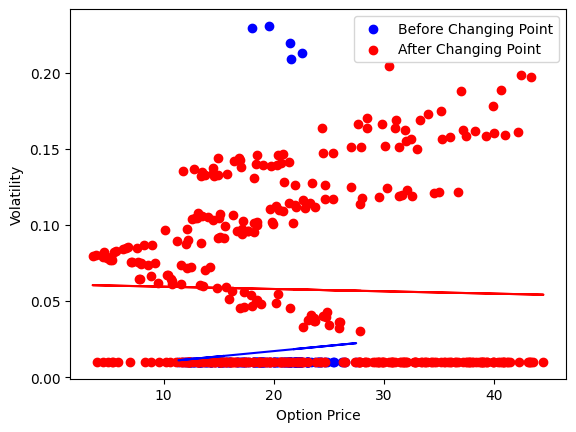

4
Changing Point: 2021-12-07 00:00:00

Before Changing Point:
Intercept: 0.004661973337520563
Coefficient: [0.00061595]

After Changing Point:
Intercept: 0.06047728955522578
Coefficient: [-7.06043968e-05]


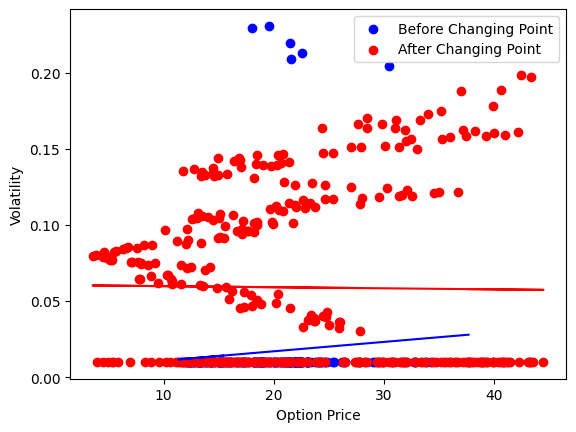

5
Changing Point: 2022-01-05 00:00:00

Before Changing Point:
Intercept: -0.00016971707108759393
Coefficient: [0.00086901]

After Changing Point:
Intercept: 0.05509509005946018
Coefficient: [0.00026031]


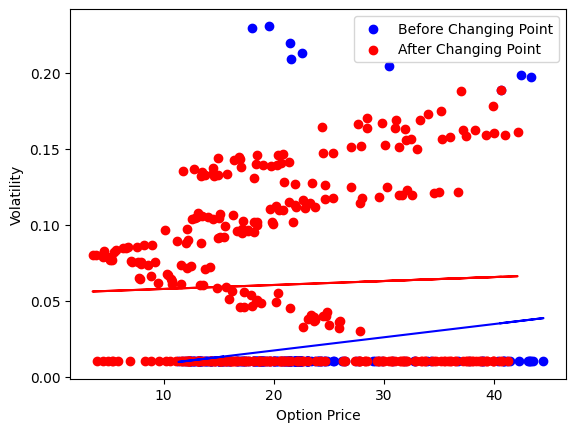

6
Changing Point: 2022-02-17 00:00:00

Before Changing Point:
Intercept: 0.001247362977640068
Coefficient: [0.00078496]

After Changing Point:
Intercept: 0.04599691860311466
Coefficient: [0.0008703]


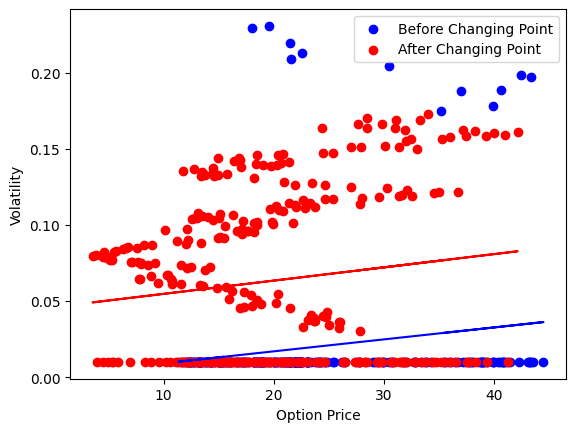

7
Changing Point: 2022-03-18 00:00:00

Before Changing Point:
Intercept: -0.0016263214065285504
Coefficient: [0.00108555]

After Changing Point:
Intercept: 0.04536873905160596
Coefficient: [0.00090075]


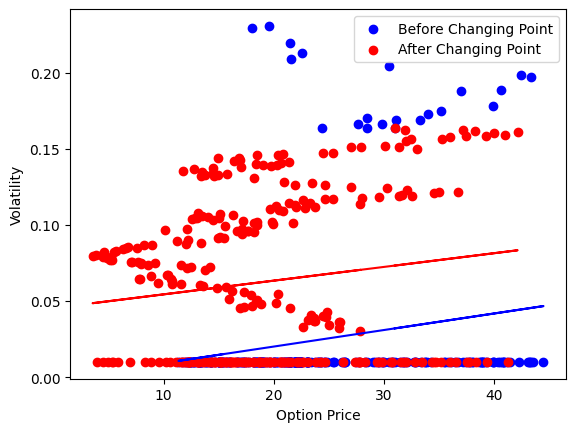

8
Changing Point: 2022-04-08 00:00:00

Before Changing Point:
Intercept: -0.01132411323555468
Coefficient: [0.00160559]

After Changing Point:
Intercept: 0.05052764717132609
Coefficient: [0.00055453]


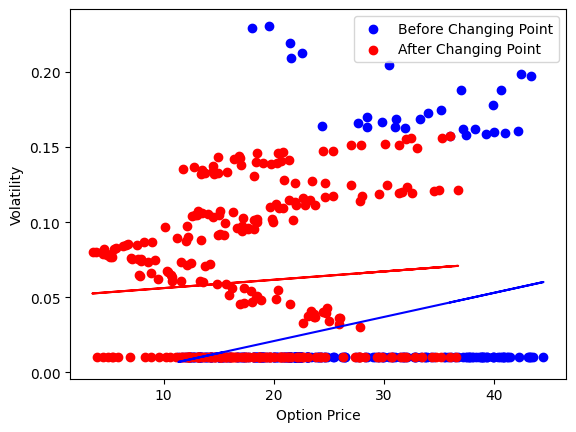

9
Changing Point: 2022-05-09 00:00:00

Before Changing Point:
Intercept: -0.012260154552434455
Coefficient: [0.00174152]

After Changing Point:
Intercept: 0.05335857291722615
Coefficient: [0.00035947]


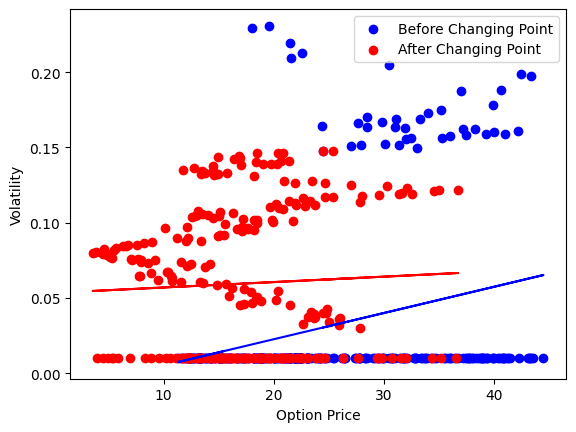

10
Changing Point: 2022-07-14 00:00:00

Before Changing Point:
Intercept: 0.017848167662022518
Coefficient: [0.00088248]

After Changing Point:
Intercept: 0.04895232303958712
Coefficient: [0.00028494]


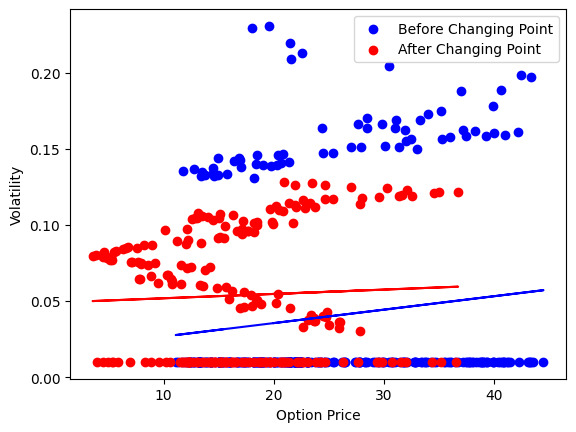

11
Changing Point: 2022-07-28 00:00:00

Before Changing Point:
Intercept: 0.018559591368466254
Coefficient: [0.00087681]

After Changing Point:
Intercept: 0.04970282848234495
Coefficient: [0.00023575]


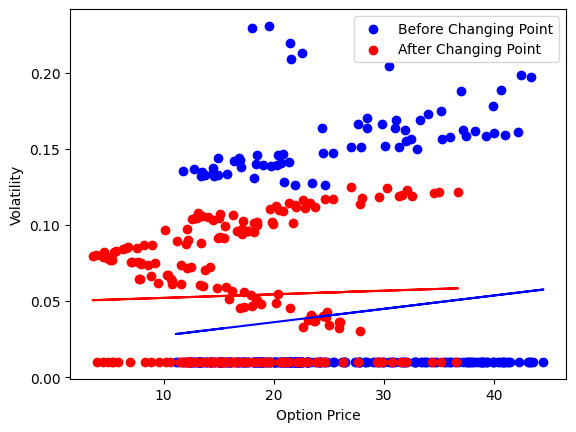

12
Changing Point: 2022-08-25 00:00:00

Before Changing Point:
Intercept: 0.017168482804331694
Coefficient: [0.00096407]

After Changing Point:
Intercept: 0.05020749811018584
Coefficient: [0.00021858]


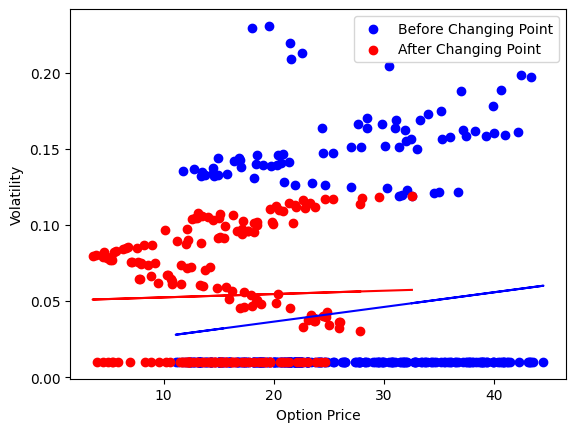

13
Changing Point: 2022-09-23 00:00:00

Before Changing Point:
Intercept: 0.019927482555879932
Coefficient: [0.0009446]

After Changing Point:
Intercept: 0.06431409881189117
Coefficient: [-0.00099162]


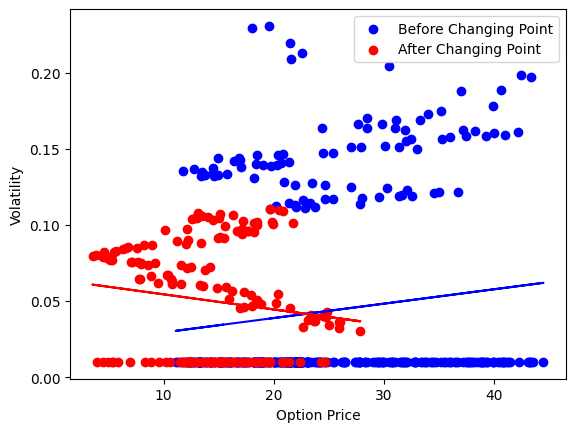

14
Changing Point: 2022-12-12 00:00:00

Before Changing Point:
Intercept: 0.032349050081044786
Coefficient: [0.00057549]

After Changing Point:
Intercept: 0.06682919972241746
Coefficient: [-0.00176061]


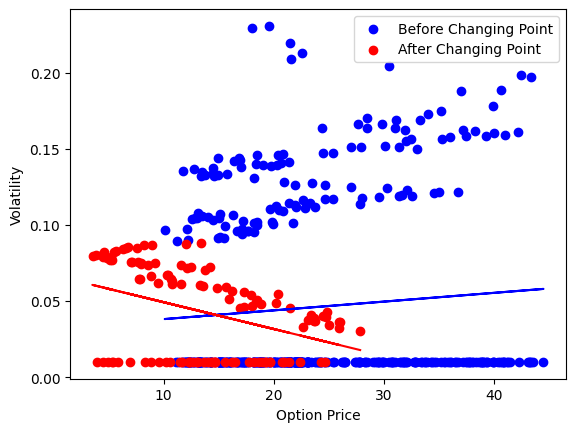

15
Changing Point: 2023-01-26 00:00:00

Before Changing Point:
Intercept: 0.04151485426957524
Coefficient: [0.00024899]

After Changing Point:
Intercept: 0.054769487672015095
Coefficient: [-0.00117185]


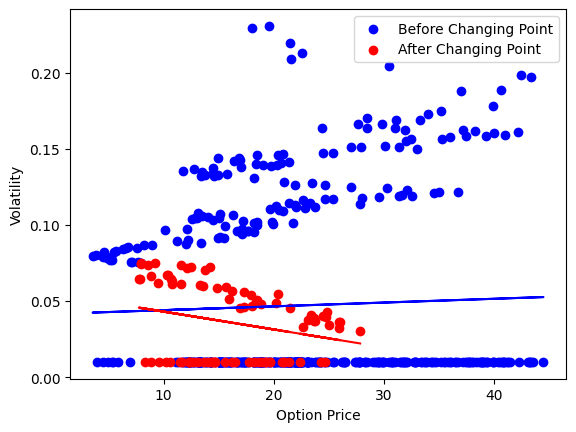

16
Changing Point: 2023-03-17 00:00:00

Before Changing Point:
Intercept: 0.04137462333559682
Coefficient: [0.00025033]

After Changing Point:
Intercept: 0.02968265990044772
Coefficient: [4.0140935e-05]


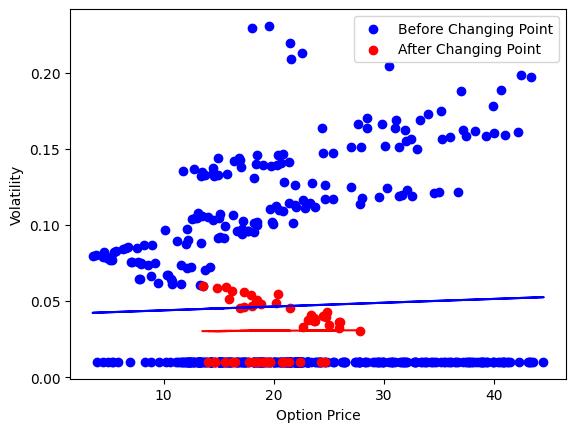

17
Changing Point: 2023-05-01 00:00:00

Before Changing Point:
Intercept: 0.03970624769079263
Coefficient: [0.00028827]

After Changing Point:
Intercept: -0.05238517362529799
Coefficient: [0.00339279]


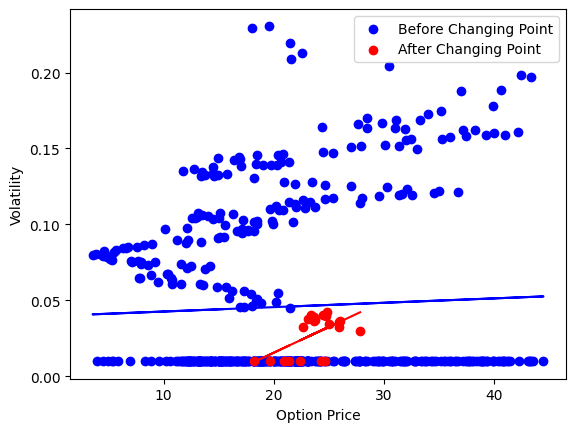

In [12]:
for i in range(len(breaks_rpt)-1): # exclude last one since no more data after
    print(i+1)
    regression_analysis(opt_prices_iv, breaks_rpt[i])

# Parametric Test (T-test)

In [13]:
from scipy.stats import ttest_ind

In [14]:
from datetime import datetime, timedelta

In [15]:
def t_test(data, change_point_date):
    print(change_point_date)
    change_point_date = pd.to_datetime(change_point_date) - timedelta(days=1)

    changing_point = pd.to_datetime(change_point_date) # '2022-11-02' # 2022-10-19 so we will substitute 2022-10-18 for convenience in the next 2 lines
    data_before = data[:changing_point]
    data_after = data[changing_point:]

    volatility_before = data_before['bsm_iv']
    volatility_after = data_after['bsm_iv']

    # T-test
    t_stat, p_value = ttest_ind(volatility_before, volatility_after)


    print("T-Statistic: ", t_stat)
    print("P-Value: ", p_value)

    # Interpretations
    alpha = 0.05  # Significance level
    if p_value < alpha:
        print("There is a statistically significant difference in volatility before and after the changing point.")
    else:
        print("There is no statistically significant difference in volatility before and after the changing point.")


In [16]:
counter = 1
for i in breaks_rpt:
    print(counter)
    counter += 1
    t_test(opt_prices_iv, i)
    print()
    print()

1
2021-05-05 00:00:00
T-Statistic:  -3.6343680196240884
P-Value:  0.00030484623820922275
There is a statistically significant difference in volatility before and after the changing point.


2
2021-07-01 00:00:00
T-Statistic:  -5.947907536692952
P-Value:  4.838278168774594e-09
There is a statistically significant difference in volatility before and after the changing point.


3
2021-11-15 00:00:00
T-Statistic:  -8.667347212288451
P-Value:  4.9985671862843077e-17
There is a statistically significant difference in volatility before and after the changing point.


4
2021-12-07 00:00:00
T-Statistic:  -9.094520202208798
P-Value:  1.7329315265321709e-18
There is a statistically significant difference in volatility before and after the changing point.


5
2022-01-05 00:00:00
T-Statistic:  -9.498657926755541
P-Value:  6.504235462569575e-20
There is a statistically significant difference in volatility before and after the changing point.


6
2022-02-17 00:00:00
T-Statistic:  -9.958106051961522
P

/var/folders/xd/xm863f553v750zss70sl77sc0000gn/T/ipykernel_2901/1458161964.py:13: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  t_stat, p_value = ttest_ind(volatility_before, volatility_after)
/Users/artemilin/PycharmProjects/pythonProject/venv/lib/python3.9/site-packages/scipy/stats/_stats_py.py:1250: RuntimeWarning: divide by zero encountered in divide
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero
/Users/artemilin/PycharmProjects/pythonProject/venv/lib/python3.9/site-packages/scipy/stats/_stats_py.py:1250: RuntimeWarning: invalid value encountered in double_scalars
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero
